In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk. stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

STOPWORDS = set(stopwords.words('english'))

from sklearn. model_selection import train_test_split
from sklearn. preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn. model_selection import cross_val_score
from sklearn. ensemble import RandomForestClassifier
from sklearn. metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn. model_selection import GridSearchCV
from sklearn. model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn. tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import re
import pickle


/Users/kartheevalmiki/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kartheevalmiki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Load the datd

data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)
print (f"Dataset shape : {data. shape}")

Dataset shape : (3150, 5)


In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
#Column names
print (f" Feature names : {data. columns. values}")

 Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [5]:
data.isnull()

,rating,date,variation,verified_reviews,feedback
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3145,False,False,False,False,False
3146,False,False,False,False,False
3147,False,False,False,False,False
3148,False,False,False,False,False


In [6]:
#Getting the record where 'verified reviews' is null
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(3149, 5)

In [9]:
#Creating a new column 'Length' that will contain the Length of the string in 'verified reviews' column
data[' length'] = data[ 'verified_reviews'].apply(len)

In [10]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [11]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
 length              int64
dtype: object

In [12]:
len(data)

3149

In [13]:
#Distinct values of 'rating' and its count

print (f"Rating value count: \n{data['rating'].value_counts ()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


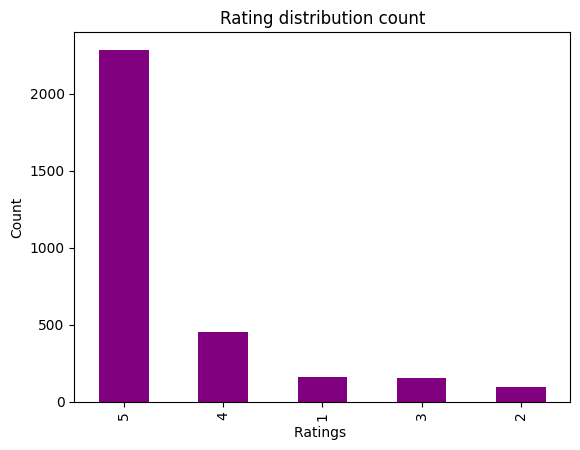

In [14]:
#Bar plot to visualize the total counts of each rating

data['rating' ].value_counts ().plot.bar (color = 'purple')
plt. title('Rating distribution count')
plt. xlabel ('Ratings ')
plt.ylabel('Count')
plt.show()

In [15]:
print (f"Rating value count - percentage distribution: \n{round (data['rating']. value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


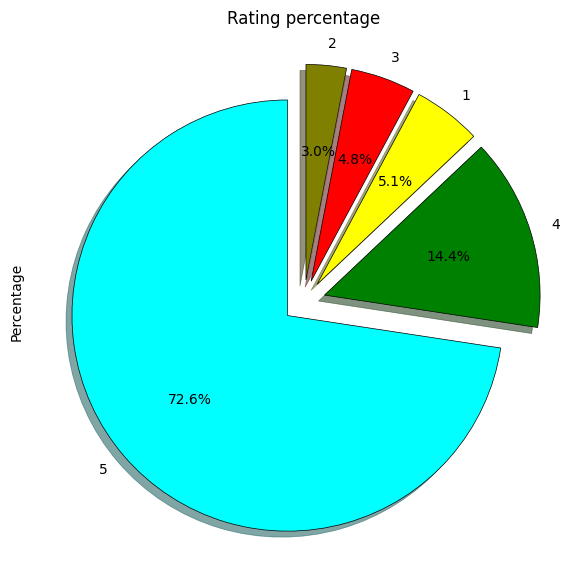

In [16]:
# pie plot for rating percentage

fig = plt. figure (figsize=(7,7))
colors = ('cyan', 'green', 'yellow', 'red', 'olive')
Wp = {'linewidth':0.5, "edgecolor": 'black'}
tags = data['rating' ].value_counts ()/data. shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
plt. title('Rating percentage')
tags. plot (kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=Wp, explode=explode, label='Percentage')
from io import BytesIO
graph = BytesIO()
fig. savefig(graph, format="png")

In [17]:
#Distinct values of 'feedback' and its count
print (f"Feedback value count: \n{data['feedback']. value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [18]:
#Extracting the 'verified reviews' value for one record with feedback
review_0 = data[data['feedback'] == 0]. iloc[25]['verified_reviews']
print (review_0)

Item has never worked. Out of box it is broken. Spent several days trying to get it working and running same &#34;fixes&#34; from Amazon. The only thing accomplished is I will never order another refurbished device.


In [19]:
#Extracting the 'verified reviews' value for one record with feedback
review_1 = data[data['feedback'] == 1]. iloc[1]['verified_reviews']
print (review_1)

Loved it!


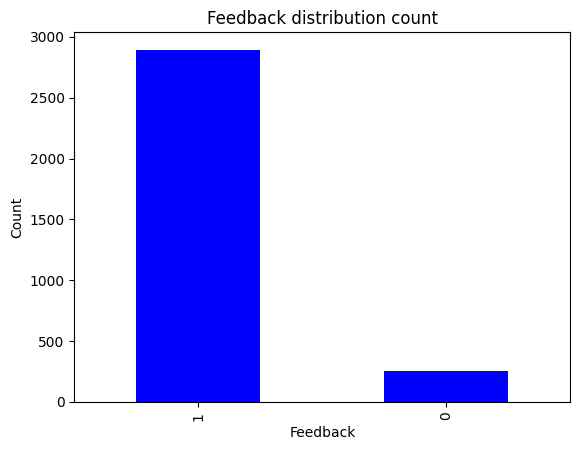

In [20]:
#Bar graph to visualize the total counts of each feedback
data['feedback']. value_counts ().plot. bar (color = 'blue')
plt. title('Feedback distribution count')
plt. xlabel ('Feedback')
plt.ylabel('Count')
plt.show()

Note: 1 - positive feebacks and 0 - negative feedbacks 

In [21]:
print (f"Feedback value count - percentage distribution: \n{round(data['feedback']. value_counts()/data. shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


### percentages of feedbacks 

1) positive feedbacks - 91.87

2) negative feedbacks - 8.13

<AxesSubplot: title={'center': 'Feedback %'}, ylabel='Percentage'>

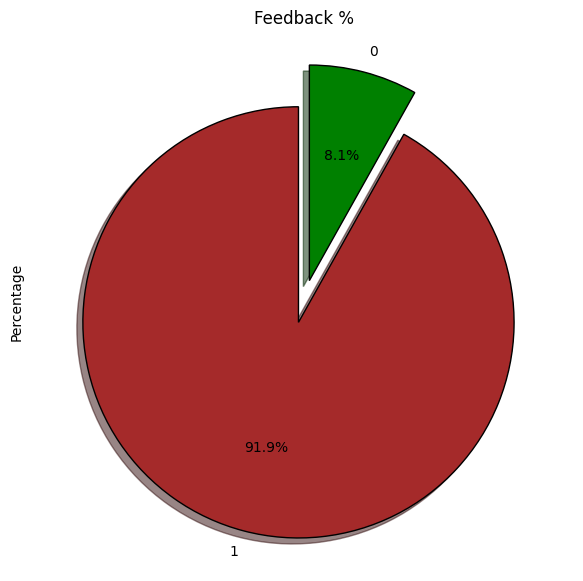

In [22]:
fig = plt. figure(figsize=(7,7))
colors = ('brown', 'green')
wp = {'linewidth': 1, "edgecolor": 'black'}
tags = data['feedback' ].value_counts()/data. shape[0]
explode=(0.1,0.1)
plt.title('Feedback %')
tags .plot (kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label= 'Percentage')

In [23]:
#Feedback = 0
data[data['feedback'] == 0]['rating']. value_counts ()

rating
1    161
2     95
Name: count, dtype: int64

In [24]:
#Feedback = 1
data[data['feedback'] == 1]['rating']. value_counts ()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [25]:
#Distinct values of 'variation' and its count
print (f" Variation value count: \n{data['variation']. value_counts()}")

 Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


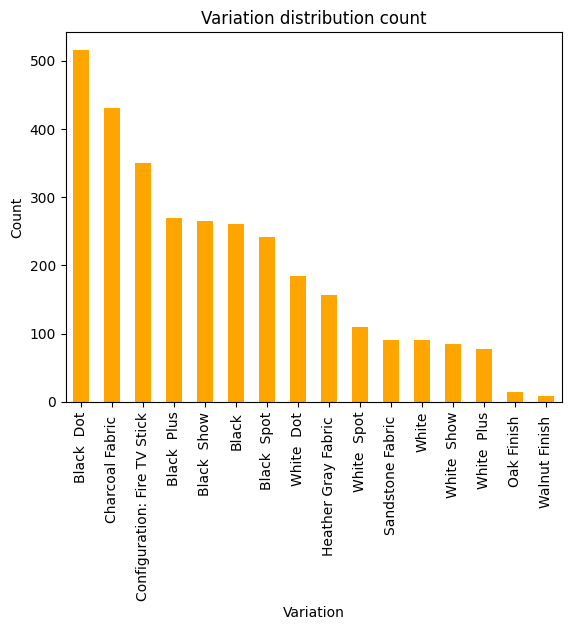

In [26]:
#Bar graph to visualize the total counts of each variation
data['variation' ]. value_counts() .plot.bar(color = 'orange')
plt. title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt. show()

In [27]:
print (f" Variation value count - percentage distribution: \n{round(data['variation'] .value_counts()/data.shape[0]*100,2)}")

 Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [28]:
data[" length"].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name:  length, dtype: float64

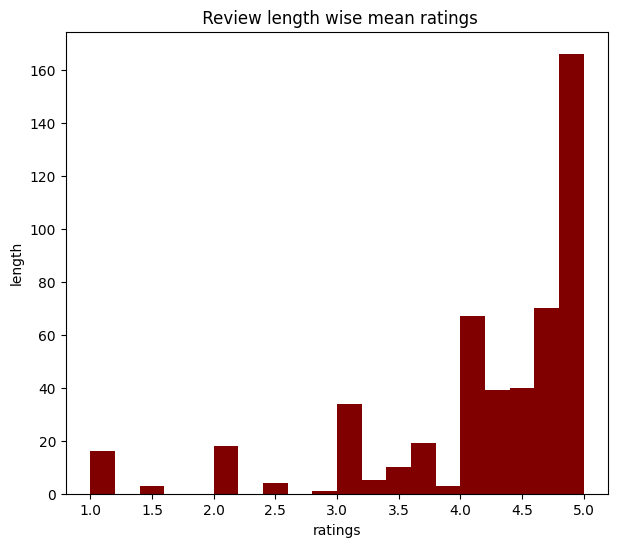

In [29]:
data. groupby(" length")['rating' ].mean ().plot. hist (color = 'maroon',figsize=(7, 6), bins = 20)
plt. title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel("length")
plt.show()

In [30]:
cv = CountVectorizer (stop_words='english')
words = cv. fit_transform(data.verified_reviews)

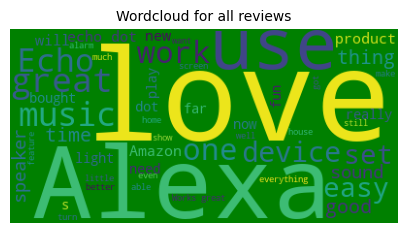

In [31]:
# Combine all reviews
reviews = " ".join ([review for review in data['verified_reviews']])
# Initialize wordcloud object
wc = WordCloud (background_color='green', max_words=50)
# Generate and plot wordcloud
plt. figure (figsize=(5,5))
plt.imshow(wc.generate(reviews))
plt. title( 'Wordcloud for all reviews', fontsize=10)
plt. axis ('off')
plt.show()

In [32]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[ data['feedback'] == 0]["verified_reviews"]])
neg_reviews = neg_reviews.lower().split ()
pos_reviews = " ".join ([review for review in data[data['feedback'] == 1]["verified_reviews"]])
pos_reviews = pos_reviews.lower().split()
#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " " .join(unique_negative)
unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " " .join(unique_positive)

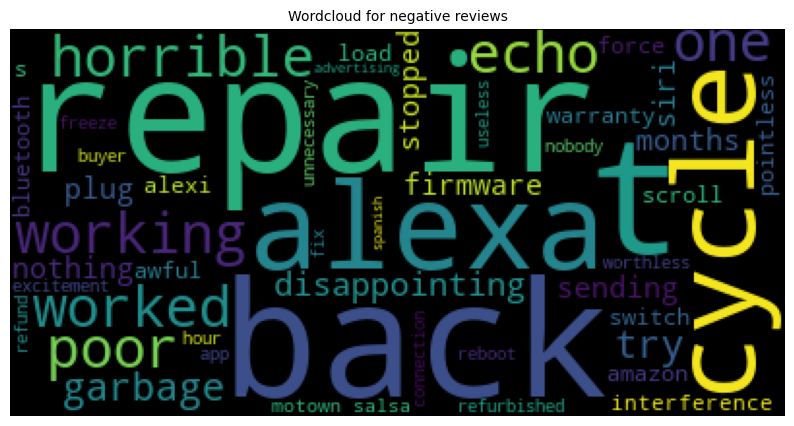

In [33]:
wc = WordCloud(background_color='black', max_words=50)
#Generate and plot wordcloud
plt. figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt. title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

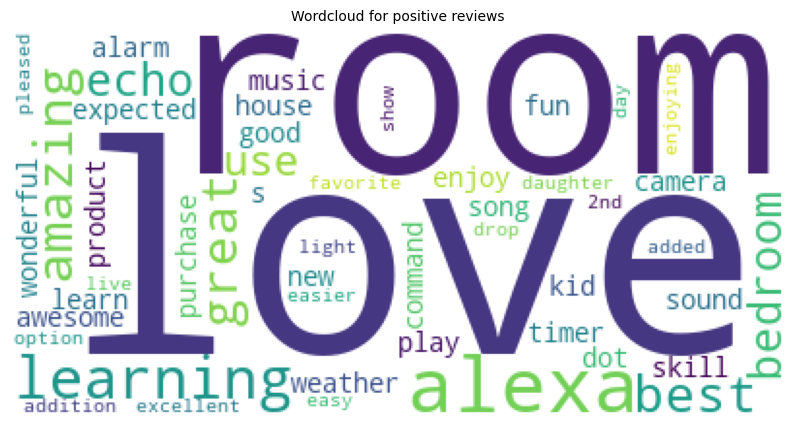

In [34]:
wc = WordCloud(background_color='white', max_words=50)
#Generate and plot wordcloud
plt. figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt. title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

# Model Building

To build the corpus from the 'verified reviews' we perform the following-
1. Replace any non alphabet characters with a space
2. Covert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [35]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data. shape[0]):
    review = re.sub('[^a-zA-Z]',' ', data.iloc[i]['verified_reviews'])
    review = review. lower() .split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ''.join(review)
    corpus. append (review)

In [36]:
CV = CountVectorizer(max_features = 2500)
#Storing independent and dependent variables in X and y
X = cv. fit_transform(corpus). toarray()
y = data['feedback'].values

In [37]:
#Saving the Count Vectorizer
pickle.dump(cv, open ('countVectorizer.pl', 'wb'))

In [38]:
print (f"X shape: {X.shape}")
print (f"y shape: {y. shape}")

X shape: (3149, 2161)
y shape: (3149,)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
print (f"X train: {X_train. shape}")
print (f"y train: {y_train. shape}")
print (f"X test: {X_test. shape}")
print (f"y test: {y_test. shape}")

X train: (2204, 2161)
y train: (2204,)
X test: (945, 2161)
y test: (945,)


In [40]:
print (f"X train max value: {X_train.max()}")
print (f"X test max value: {X_test.max()}")

X train max value: 1
X test max value: 1


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [42]:
#Saving the scaler model
pickle.dump(scaler, open ('scaler.pkl', 'wb'))

In [43]:
#Fitting scaled X train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit (X_train_scl, y_train)

RandomForestClassifier()

In [44]:
#Accuracy of the model on training and testing data
print ("Training Accuracy :", model_rf.score(X_train_scl,y_train))
print("Testing Accuracy:" , model_rf.score(X_test_scl,y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy: 0.9375661375661376


In [45]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [46]:
#Confusion Matrix
cm = confusion_matrix (y_test, y_preds)

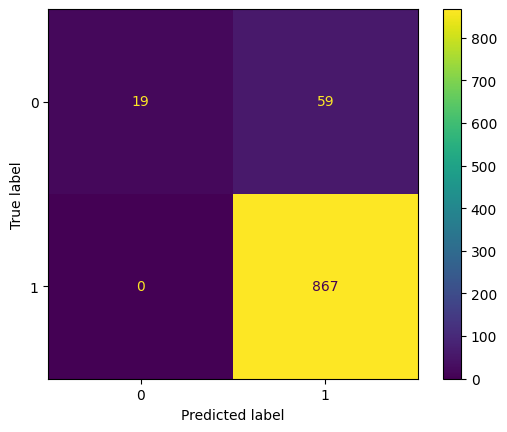

In [47]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt. show()

In [48]:
accuracies = cross_val_score (estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)
print ("Accuracy :", accuracies.mean())
print ("Standard Variance:", accuracies.std())

Accuracy : 0.9283155080213904
Standard Variance: 0.006941824271914912


In [49]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [ ]:
cv_object = StratifiedKFold(n_splits = 2)
grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

In [ ]:
#Getting the best parameters from the grid search
print ("Best Parameter Combination {}".format(grid_search.best_params_))

In [ ]:
print ("Cross validation mean accuracy on train set :{}".format(grid_search.cv_results_[ 'mean_train_score'].mean()*100))
print ("Cross validation mean accuracy on test set: {}". format (grid_search. cv_results_['mean_test_score']. mean()*100))
print ("Accuracy score for test set:",accuracy_score(y_test, y_preds))

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit (X_train_scl, y_train)

In [ ]:
#Accuracy of the model on training and testing data
print ("Training Accuracy :", model_xgb. score(X_train_scl, y_train))
print ("Testing Accuracy :", model_xgb. score(X_test_scl, y_test))

In [ ]:
y_preds = model_xgb.predict (X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix (y_test, y_preds)
print (cm)

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show

In [ ]:
#Saving the XGBoost classifier
pickle.dump (model_xgb, open ('model_xgb.pkl', 'wb'))

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt. fit (X_train_scl, y_train)

In [ ]:
#Accuracy of the model on training and testing data
print ("Training Accuracy :", model_dt. score(X_train_scl, y_train))
print ("Testing Accuracy :", model_dt. score(X_test_scl, y_test))

In [ ]:
y_preds = model_dt.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix (y_test, y_preds)
print (cm)

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()